# **1 - Perkenalan**

---



Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Andik Al Fauzi

Objective : Membuat model machine learning untuk membuat prediksi penjualan

# **3 - Import Libraries**

---



Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [9]:
# Importing libraries
import pandas as pd
import numpy as np
import calendar

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Model Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, classification_report, accuracy_score
from math import sqrt

# Importing Libraries
import pickle
import json
import datetime as dt

# Warning Library
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Installing other library
!pip install pyramid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 29.1 MB/s eta 0:00:00


# **4 - Data Loading**

---



Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [25]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/andik-alfauzi/Final-Project/main/sample_dataset_timeseries_noarea.csv')

# Display
data.head(10)

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
5,2021-52,2021-12-27,2022-01-02,01fa9977e1c61ce5542c6f0c2a1b2895,2
6,2021-52,2021-12-27,2022-01-02,043e6d02d98b44c40645c8a22812fe88,44
7,2021-52,2021-12-27,2022-01-02,0512efdcc99fa4d57c42cd2cf6c73633,165
8,2021-52,2021-12-27,2022-01-02,05262da388ab82c51c48c9535bc8b121,41
9,2021-52,2021-12-27,2022-01-02,058cc2cecb91d10e901a597e67532619,383


# **5 - Exploratory Data Analysis (EDA)**

---

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.



In [26]:
# Describing data
data.describe()

,quantity
count,102733.000000
mean,3191.562419
std,12074.631014
min,0.000000
25%,75.000000
50%,414.000000
75%,1890.000000
max,774732.000000


In [27]:
# Info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


Hampir semua data bertipe object, hanya 1 yang bertipe numerik yaitu quantity

In [28]:
# Convert dataset
data['week_start_date'] = pd.to_datetime(data['week_start_date'], format='%Y-%m-%d')
data['week_end_date'] = pd.to_datetime(data['week_end_date'], format='%Y-%m-%d')

# Check after converting
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   week_number      102733 non-null  object        
 1   week_start_date  102733 non-null  datetime64[ns]
 2   week_end_date    102733 non-null  datetime64[ns]
 3   product_item     102731 non-null  object        
 4   quantity         102733 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ MB


In [29]:
# Check invertal of data
data['freq'] = ((data['week_end_date'] - data['week_start_date']).dt.days)+1

# Display
print('Interval date range : ', data.freq.unique())

Interval date range :  [7]


Semua data memiliki range yang sama yaitu penjualan mingguan

In [31]:
# Check missing value
data.loc[(data['quantity'] == 0)]

,week_number,week_start_date,week_end_date,product_item,quantity,freq
72589,2022-47,2022-11-21,2022-11-27,6adc4ddabd44c5aa2f4c6105ceda926a,0,7
74199,2022-48,2022-11-28,2022-12-04,6adc4ddabd44c5aa2f4c6105ceda926a,0,7
75806,2022-49,2022-12-05,2022-12-11,6adc4ddabd44c5aa2f4c6105ceda926a,0,7


Ada 1 item yang tidak memiliki performa penjualan

In [32]:
# Check sales per item
salesPerItem = data.groupby('product_item', as_index=False)['quantity'].sum()

# Creating dataframe
salesPerItem = pd.DataFrame(salesPerItem)

# Display
salesPerItem.head()

,product_item,quantity
0,00450b4fde94b528b4255b4f6f51599d,15691
1,0065e8b533cd2c8273529312a6e8f219,29334
2,0073377087c7ddace313ff829cd7b0b3,9645
3,0098d23d332c193a07eabaf0f703d4e5,214632
4,009e12e8fd2ef0b77047206e939fc6b9,39402


In [33]:
# Describing sales per item
salesPerItem.describe()

,quantity
count,2.309000e+03
mean,1.420002e+05
std,5.951554e+05
min,2.000000e+00
25%,8.960000e+02
50%,1.040600e+04
75%,7.377700e+04
max,1.820638e+07


Penjualan maksimal per item ada di angka 18 jutaan product yang terjual dan terendah ada di angka 2 product

In [65]:
# Check the lowest sales
lowSales = data.loc[(data['quantity'] == 2)]
lowSales

,week_number,week_start_date,week_end_date,product_item,quantity,freq
5,2021-52,2021-12-27,2022-01-02,01fa9977e1c61ce5542c6f0c2a1b2895,2,7
19,2021-52,2021-12-27,2022-01-02,09ba614cfa8b54cecbfb8cae73e5ce61,2,7
29,2021-52,2021-12-27,2022-01-02,0feac83195c3cb0dc40a89411dc7d8cc,2,7
39,2021-52,2021-12-27,2022-01-02,14cc05acabf806c1b760fd75c73ccb53,2,7
71,2021-52,2021-12-27,2022-01-02,2162030eafc9d41f57e56581acb2296b,2,7
...,...,...,...,...,...,...
102310,2023-14,2023-04-03,2023-04-09,b8f92334da7c3f9571a55f7e884cbfe6,2,7
102404,2023-14,2023-04-03,2023-04-09,c77fb48de4a41007e97d8b3884c7fc55,2,7
102637,2023-14,2023-04-03,2023-04-09,ef3b8ecd6b7ad7f30508da89a07db067,2,7
102676,2023-14,2023-04-03,2023-04-09,f68d9bdc3915db2e900a78f6d4be6285,2,7


In [66]:
# Grouping lowest sales
lowSales = lowSales.groupby('week_start_date')['quantity'].sum()
lowSales = pd.DataFrame(lowSales)
lowSales

,quantity
week_start_date,
2021-12-27,64
2022-01-03,18
2022-01-10,22
2022-01-17,30
2022-01-24,28
...,...
2023-03-06,28
2023-03-13,46
2023-03-20,44


<Figure size 1800x1000 with 0 Axes>

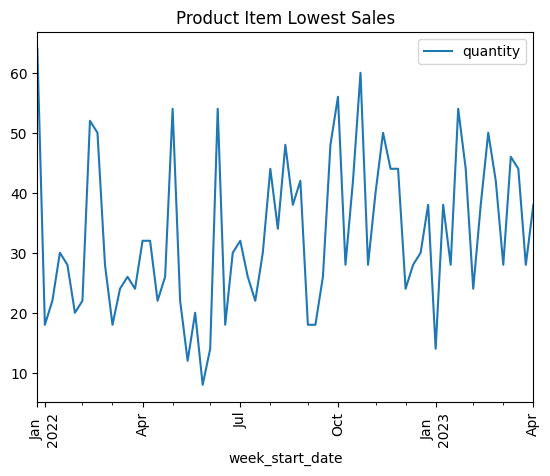

In [68]:
# Visualize 
plt.figure(figsize=(18, 10))
lowSales.plot()
plt.xticks(rotation=90)
plt.title('Product Item Lowest Sales')
plt.show()

Dapat dilihat pada grafik untuk penjualan pada May - June 2022 mengalami penjualan yang sangat rendah, dimana total penjualan hanya dibawah 10 dari total penjualan item yang memiliki total penjualan terendah. Hal ini mungkin diakibatkan karena adanya Libur Idul Fitri 1434 Hijriah dan adanya proses Pendaftaran siswa baru/Kenaikan kelas, sehingga para pelanggan tidak memiliki budget untuk membeli product-product dari **ParagonCorp**. 

In [69]:
# Prepare Data
sales = data.groupby('week_start_date')['quantity'].sum()

# Display
sales.head(10)

week_start_date
2021-12-27     128808
2022-01-03    3839557
2022-01-10    4138934
2022-01-17    4149077
2022-01-24    4824273
2022-01-31    4008027
2022-02-07    4311010
2022-02-14    3882636
2022-02-21    4256541
2022-02-28    3883810
Name: quantity, dtype: int64

Text(0.5, 1.0, 'Trend Visualization')

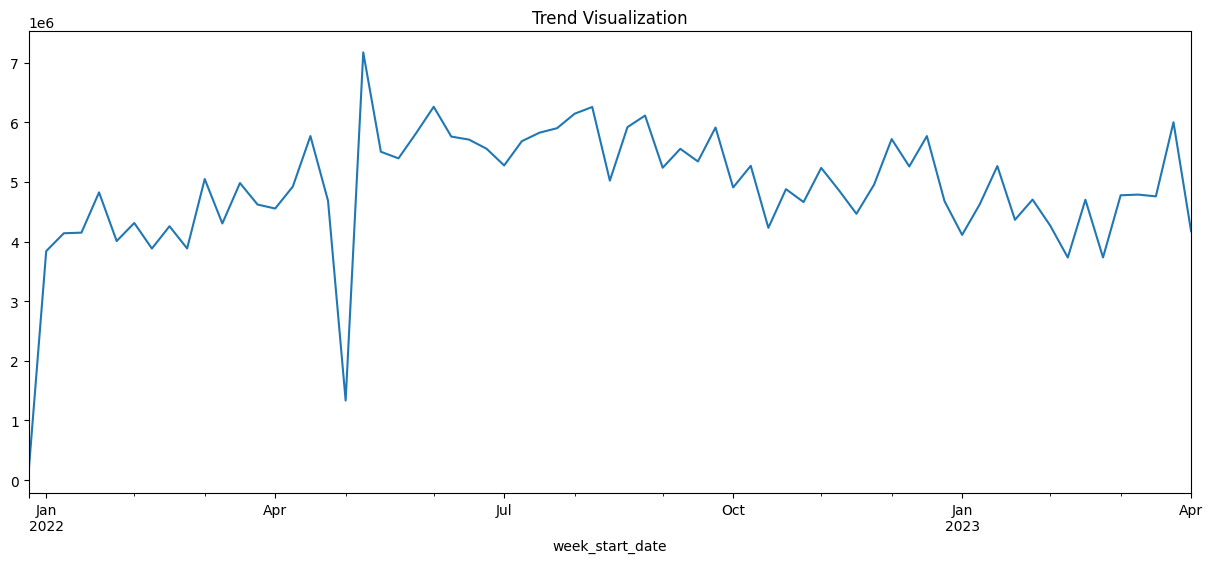

In [71]:
# Visualize the sales data
plt.figure(figsize=(15,6))
sales.plot()
plt.title('Trend Visualization')

# **6. Data Preprocessing**

---

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

# **7 - Model Definition**

---

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

# 8 - Model Training

---



Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

# **9 - Model Evaluation**

---

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

# **10 - Model Inference**

---

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

# **11 - Model Saving**

---


# **12 - Pengambilan Kesimpulan**

---


Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.